In [96]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [97]:
irisdata = pd.read_csv("/Users/Quan/Documents/irisdata.csv")
irisdata = irisdata.dropna()

In [98]:
def training(data):
    trainXvalues = data.iloc[:,:4].values
    trainYvalues = data.iloc[:,4].values
    irisdataKNN = KNeighborsClassifier(n_neighbors = 10)
    irisdataDT = DecisionTreeClassifier()
    cv_scoreKNN = cross_val_score(irisdataKNN, trainXvalues, trainYvalues, cv=5)
    cv_scoreDT = cross_val_score(irisdataDT, trainXvalues, trainYvalues, cv=5)
    averageKNN = np.mean(cv_scoreKNN)
    averageDT = np.mean(cv_scoreDT)
    return averageKNN,averageDT
    

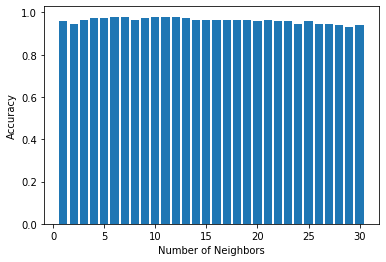

In [99]:
s = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
score = []
for i in range(len(s)):
    trainXvalues = irisdata.iloc[:,:4].values
    trainYvalues = irisdata.iloc[:,4].values
    irisdataKNN = KNeighborsClassifier(n_neighbors = s[i])
    cross = np.mean(cross_val_score(irisdataKNN,trainXvalues, trainYvalues, cv = 5))
    score.append(cross)
    
plt.bar(s,score)
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()    
    
    

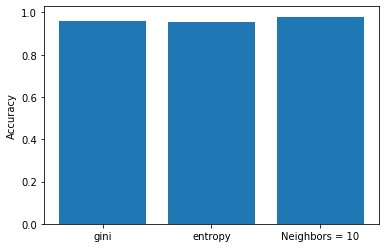

In [100]:
#Decision Tree
trainXvalues = irisdata.iloc[:,:4].values
trainYvalues = irisdata.iloc[:,4].values
irisdataDTgini = DecisionTreeClassifier(criterion = "gini")
crossgini = np.mean(cross_val_score(irisdataDTgini,trainXvalues, trainYvalues, cv = 5))
irisdataDTent = DecisionTreeClassifier(criterion = "entropy")
crossent = np.mean(cross_val_score(irisdataDTent,trainXvalues, trainYvalues, cv = 5))

plt.bar(["gini","entropy","Neighbors = 10"],[crossgini,crossent,score[11]])
plt.ylabel("Accuracy")
plt.show()
